<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Student_Performance.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [122]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,NaN,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,NaN,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,NaN,8.0,5.0,74.0
9998,9.0,97.0,Yes,7.0,0.0,95.0


In [123]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,NaN,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0


In [124]:
df.isnull().sum()

,0
Hours Studied,504
Previous Scores,526
Extracurricular Activities,505
Sleep Hours,496
Sample Question Papers Practiced,513
Performance Index,494


In [125]:
df.dropna(inplace=True)

# Завдання 1
Продивіться дані, видаліть пропущені значення з стовпчика `Perfomance Index`

<Axes: >

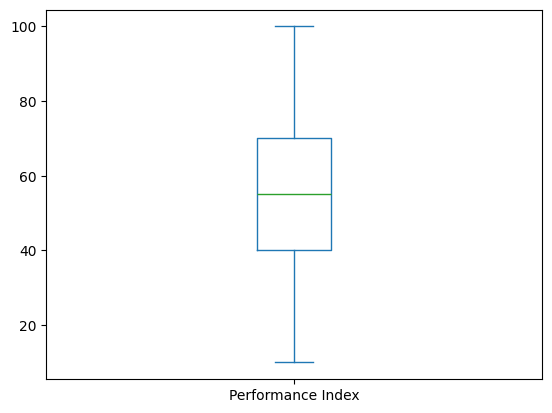

In [126]:
df["Performance Index"].plot(kind='box')

# Завдання 2
Розбийте дані на тренувальні та тестові

In [127]:
X = df[['Hours Studied','Sleep Hours','Sample Question Papers Practiced','Previous Scores']]
y = df['Performance Index']

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [129]:
X_train

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Previous Scores
750,3.0,5.0,5.0,54.0
6169,8.0,5.0,9.0,41.0
6308,5.0,9.0,6.0,75.0
851,3.0,4.0,8.0,48.0
2853,2.0,5.0,8.0,95.0
...,...,...,...,...
7101,2.0,4.0,2.0,53.0
7144,6.0,7.0,3.0,80.0
7359,6.0,4.0,6.0,88.0
1165,5.0,9.0,5.0,79.0


# Завдання 3
Побудуйте `Pipeline` для заповнення пропущених значень в усіх стовпчиках.
Або заповніть пропуски медіаною кожного стовпчика.

In [130]:
X_train.shape

(5852, 4)

# Завдання 4
Побудуйте модель та натренуйте її, виведіть метрики

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Завдання 5 оптимально
Спробуйте покращити модель

In [133]:
y_pred = model.predict(X_train)

In [134]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [135]:
res_stud =pd.DataFrame()
res_stud ['X_train'] = get_metrics(y_train,y_pred)


In [136]:
res_stud

,X_train
MAE,1.65
MSE,4.28
RMSE,2.07
R2,0.99


In [137]:
y_pred = model.predict(X_test)

In [138]:

res_stud ['X_test'] = get_metrics(y_test,y_pred)


In [139]:
res_stud

,X_train,X_test
MAE,1.65,1.60
MSE,4.28,4.11
RMSE,2.07,2.03
R2,0.99,0.99


In [140]:
model.coef_

array([2.85829291, 0.48358819, 0.19360013, 1.01865987])